In [21]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import seaborn as sns
import matplotlib.pylab as plt

In [22]:
pip install wquantiles

In [23]:
import wquantiles

#Data Preprocessing
#1 gather dataset
#2 Import dataset
#3 finding missing data
#4 Encoding categorical data
#5 split dataset
#6 Feature scaling

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
BS_CSV ='/content/drive/My Drive/Bank Dataset/Bank.csv'
df=pd.read_csv(BS_CSV)

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


#: Initial Exploration and Finding Missing Data

In [27]:
print(df.info())
print(df.isnull().sum())  # Assuming missing values are represented as NaNs.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         45211 non-null  int64  
 1   age        45199 non-null  float64
 2   job        45210 non-null  object 
 3   marital    45211 non-null  object 
 4   education  45211 non-null  object 
 5   default    45211 non-null  object 
 6   balance    45208 non-null  float64
 7   housing    45211 non-null  object 
 8   loan       45211 non-null  object 
 9   contact    45211 non-null  object 
 10  day        45211 non-null  int64  
 11  month      45211 non-null  object 
 12  duration   45211 non-null  int64  
 13  campaign   45211 non-null  int64  
 14  pdays      45211 non-null  int64  
 15  previous   45211 non-null  int64  
 16  poutcome   45211 non-null  object 
 17  y          45211 non-null  object 
dtypes: float64(2), int64(6), object(10)
memory usage: 6.2+ MB
None
Id            0
age    

#However, dataset snippet doesn't show NaNs explicitly, but missing age and balance values are hinted at by spaces. If these missing values are not NaNs but spaces or placeholders, you'll first need to convert them to NaNs.

In [28]:
# Replace spaces with NaN
df.replace('', np.nan, inplace=True)  # Assuming empty strings represent missing values.
df['age'] = pd.to_numeric(df['age'], errors='coerce')  # Convert age to numeric, making non-numeric values NaN.
df['balance'] = pd.to_numeric(df['balance'], errors='coerce')  # Convert balance to numeric, errors='coerce' turns invalid parsing into NaN.


#Step 4: Handling Missing Data
#For numerical columns like age and balance, you might fill missing values with the median or mean. For categorical columns, you might use the most frequent value or a placeholder like 'unknown'.

In [29]:
# Handling missing numerical values
df['age'].fillna(df['age'].median(), inplace=True)
df['balance'].fillna(df['balance'].median(), inplace=True)

# If 'unknown' is a legitimate category for jobs and education, we might not need to fill these. Otherwise:
df['job'].fillna('unknown', inplace=True)  # Assuming 'unknown' is an acceptable category.


#Encoding Categorical Data

In [30]:
# Identifying categorical columns that need to be encoded
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Encoding
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_cols)], remainder='passthrough')


#Split Train and Test Set
#It's important to split your data before any feature scaling to avoid data leakage.

In [31]:
X = df.drop(['y'], axis=1)
y = df['y'].apply(lambda x: 1 if x == 'yes' else 0)  # Converting 'yes'/'no' to binary format, assuming 'y' is the target variable.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Feature Scaling and Further Preprocessing
#We'll integrate feature scaling in a pipeline for numerical columns, and also apply our categorical encoding within the same transformation process.

In [32]:
# Applying transformations separately for numerical and categorical features
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Adding numeric_transformer to the ColumnTransformer
ct.transformers.append(('num', numeric_transformer, numerical_cols))

# Creating a preprocessing and training pipeline
preprocessor = Pipeline(steps=[('preprocessor', ct)])

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


#Visualization

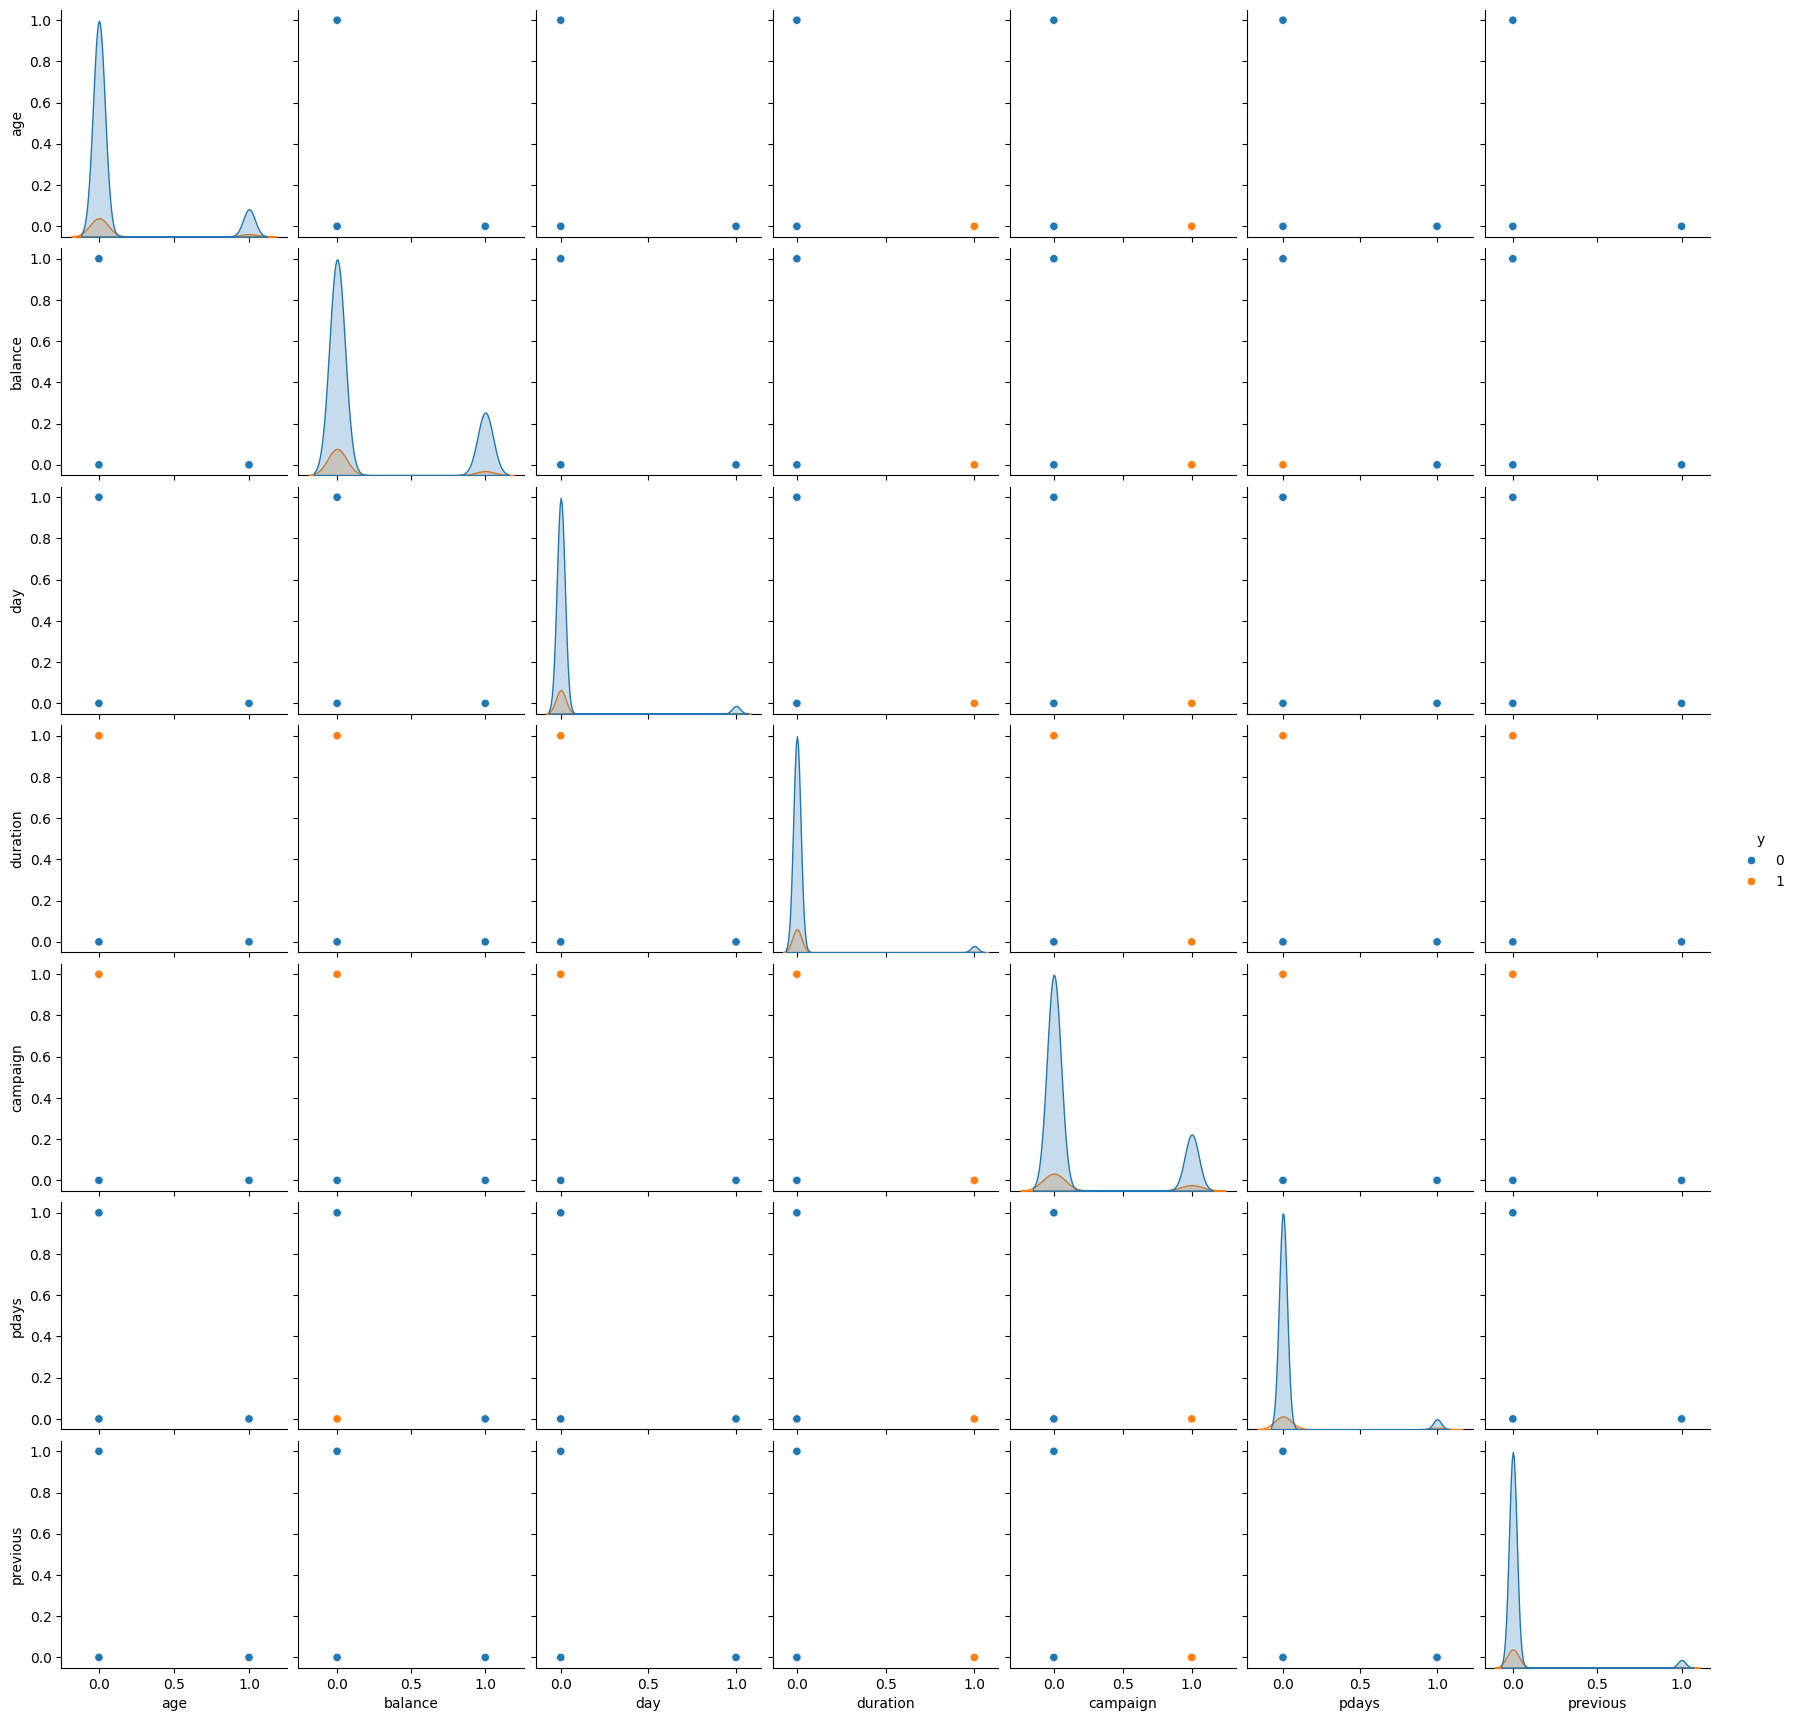

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine preprocessed X_train with y_train for visualization
train_data = pd.DataFrame(X_train_preprocessed[:, :len(numerical_cols)], columns=numerical_cols).copy()
train_data['y'] = y_train.reset_index(drop=True)

# Pairplot for numerical features with hue as the target variable
sns.pairplot(train_data, hue='y')
plt.show()


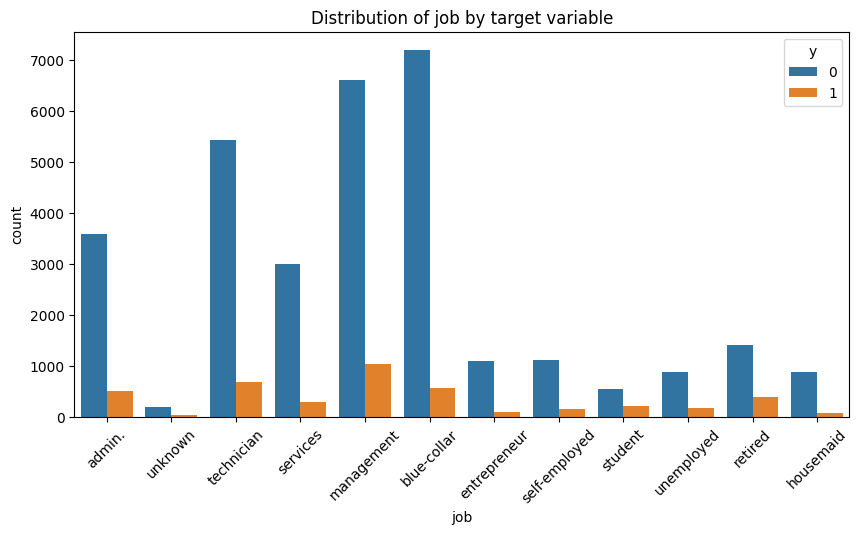

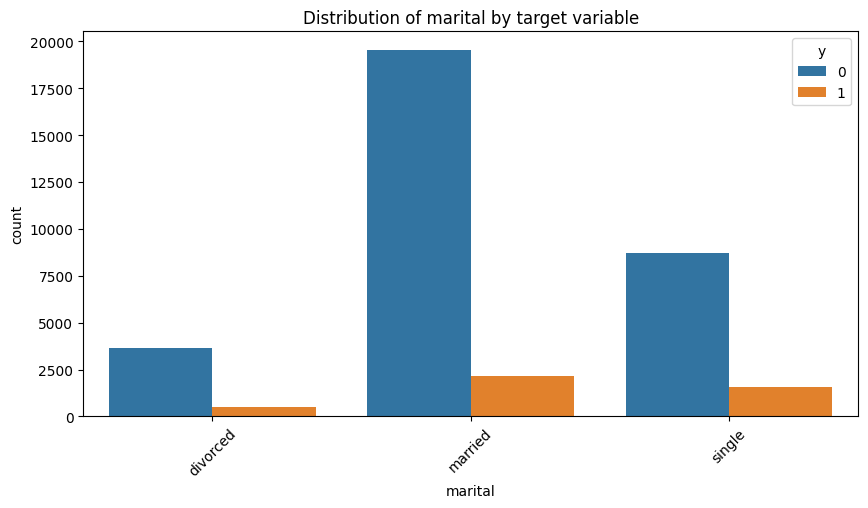

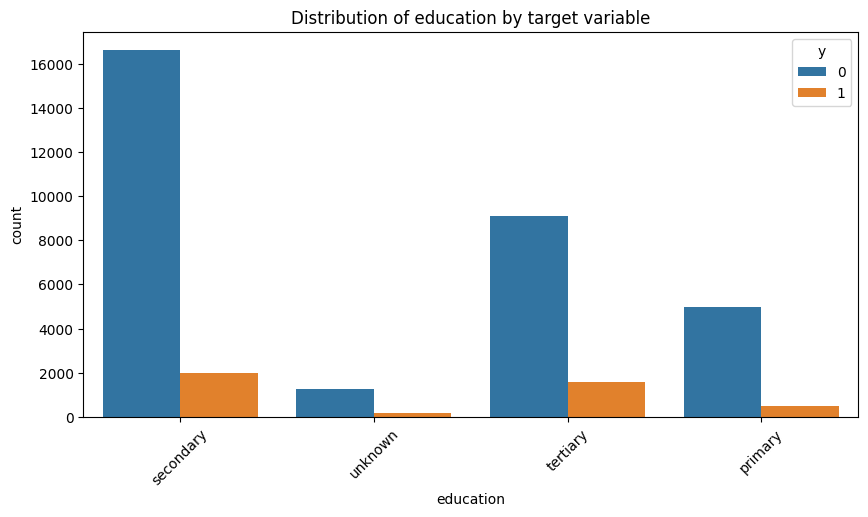

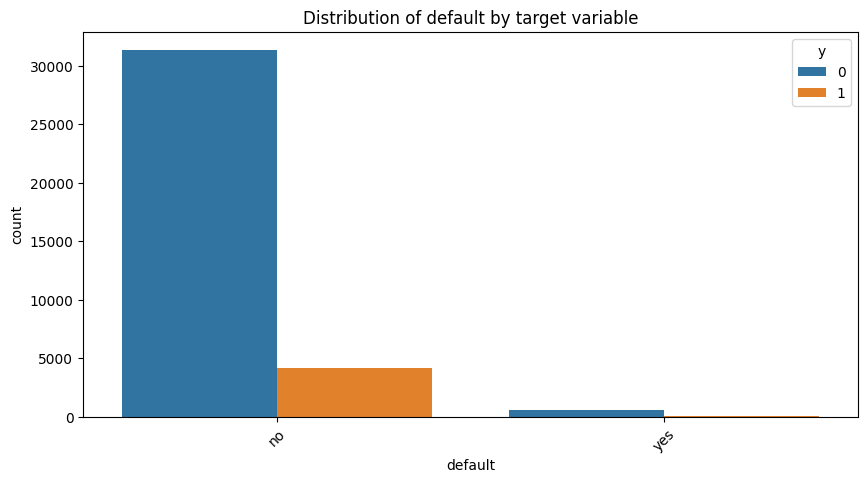

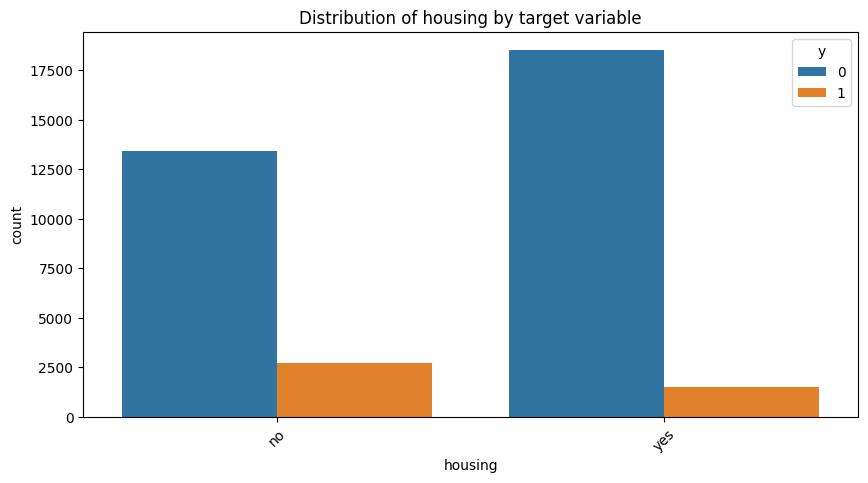

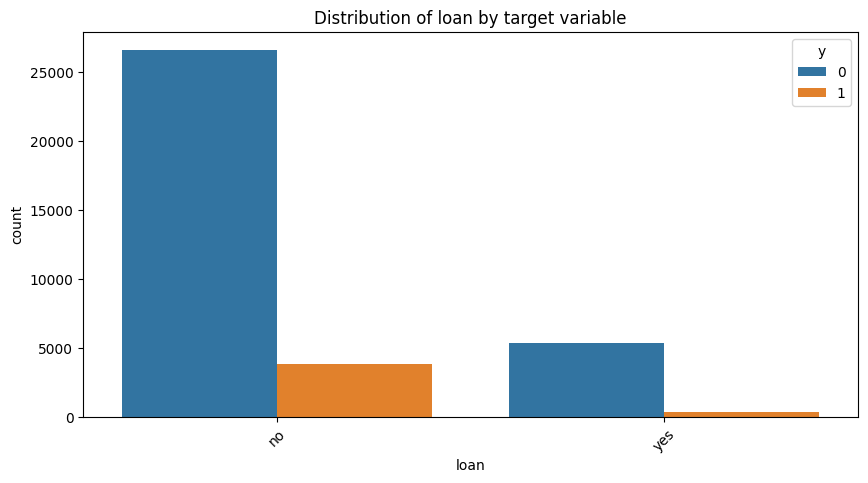

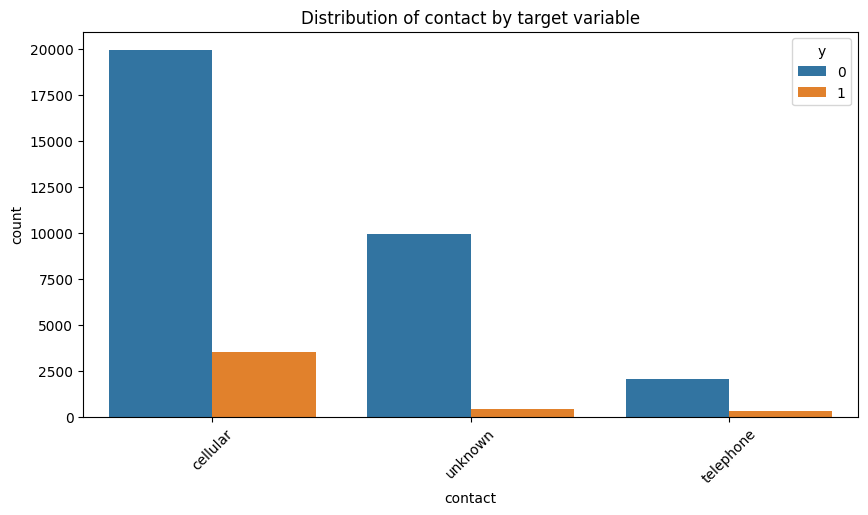

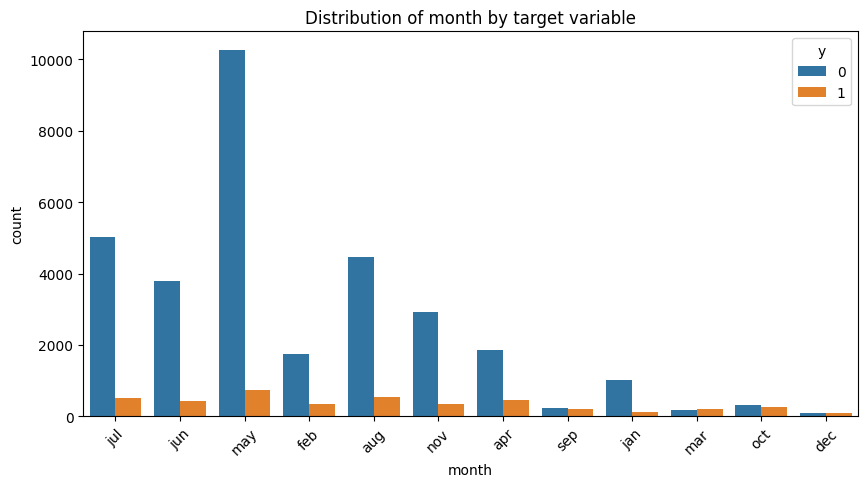

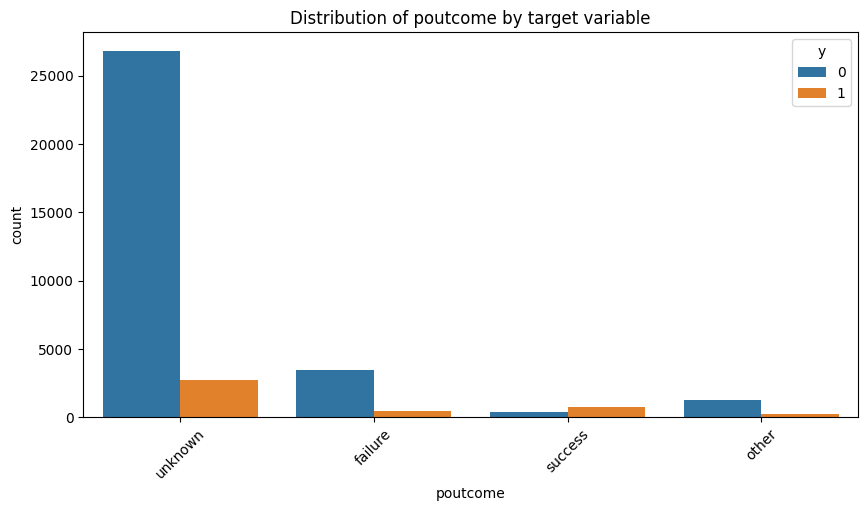

In [37]:
# Plotting categorical features
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, hue='y', data=pd.concat([X_train[col], y_train], axis=1))
    plt.title(f'Distribution of {col} by target variable')
    plt.xticks(rotation=45)
    plt.show()


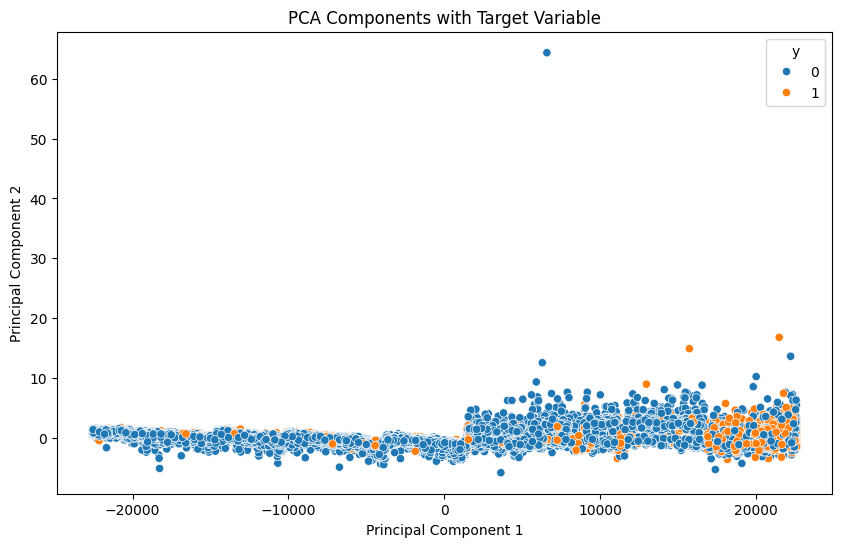

In [38]:
from sklearn.decomposition import PCA

# Applying PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_preprocessed)

# Plotting PCA components with hue as the target variable
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train)
plt.title('PCA Components with Target Variable')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


#Classification Algorithm

#Naive bayes


In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the classifier to the preprocessed training data
nb_classifier.fit(X_train_preprocessed, y_train)

# Predictions on the test set
y_pred = nb_classifier.predict(X_test_preprocessed)


#Performance Metrics of Naive bayes

Confusion Matrix:
[[7380  600]
 [ 508  555]]


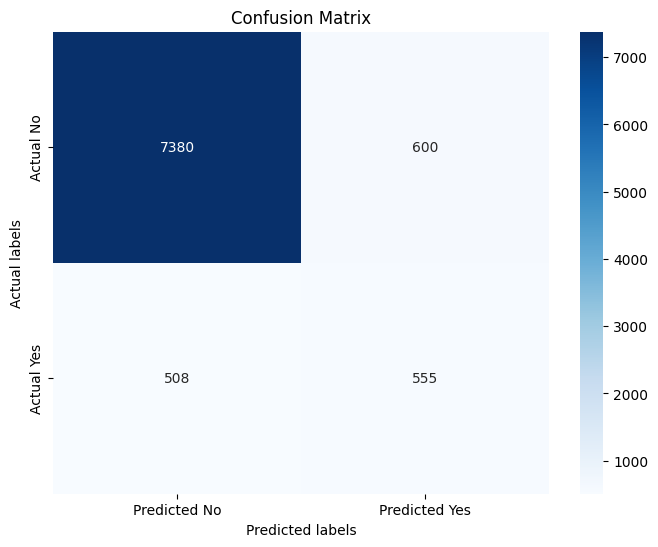

Accuracy: 0.8774742895056951
Precision: 0.4805194805194805
Recall: 0.522107243650047
F1 Score: 0.5004508566275924


In [41]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
# Visualizing Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix')
plt.show()
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)


#Logestic Regression and Its performance Metrics

Confusion Matrix:
[[7811  169]
 [ 891  172]]


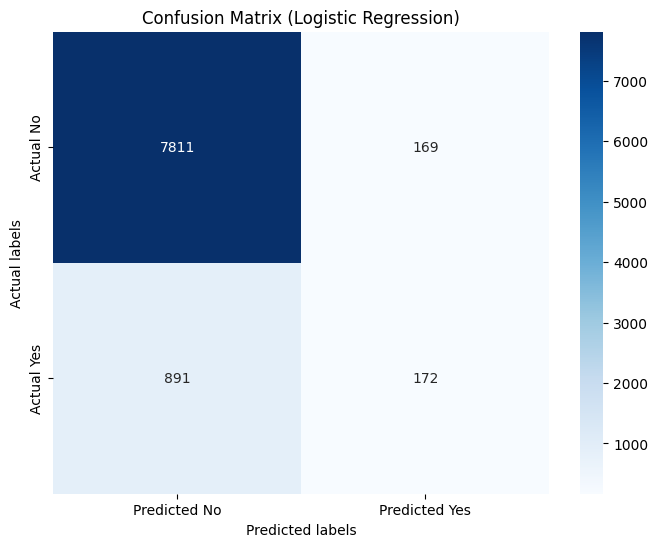

Accuracy: 0.8827822625234988
Precision: 0.5043988269794721
Recall: 0.16180620884289745
F1 Score: 0.245014245014245


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Logistic Regression classifier
lr_classifier = LogisticRegression()

# Fit the classifier to the preprocessed training data
lr_classifier.fit(X_train_preprocessed, y_train)

# Predictions on the test set
y_pred = lr_classifier.predict(X_test_preprocessed)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualizing Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)


#3 Decision Tree and its performance

Confusion Matrix:
[[7420  560]
 [ 509  554]]


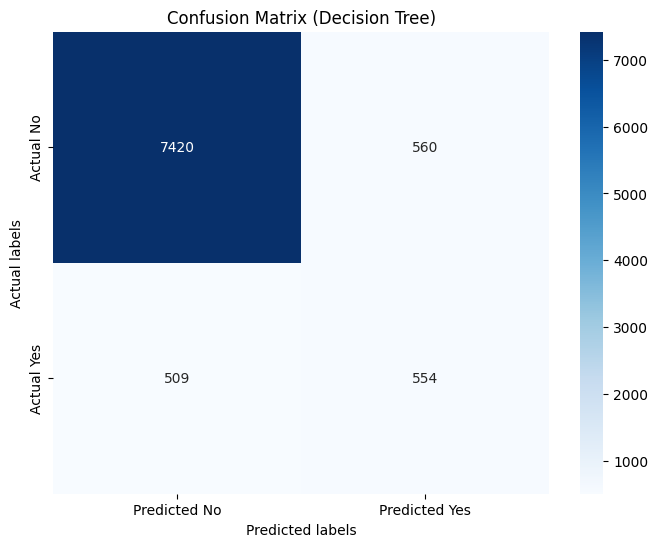

Accuracy: 0.8817870175826606
Precision: 0.49730700179533216
Recall: 0.5211665098777046
F1 Score: 0.5089572806614608


In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Fit the classifier to the preprocessed training data
dt_classifier.fit(X_train_preprocessed, y_train)

# Predictions on the test set
y_pred = dt_classifier.predict(X_test_preprocessed)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualizing Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix (Decision Tree)')
plt.show()

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)


#Random Forest and  its Performance

Confusion Matrix:
[[7704  276]
 [ 567  496]]


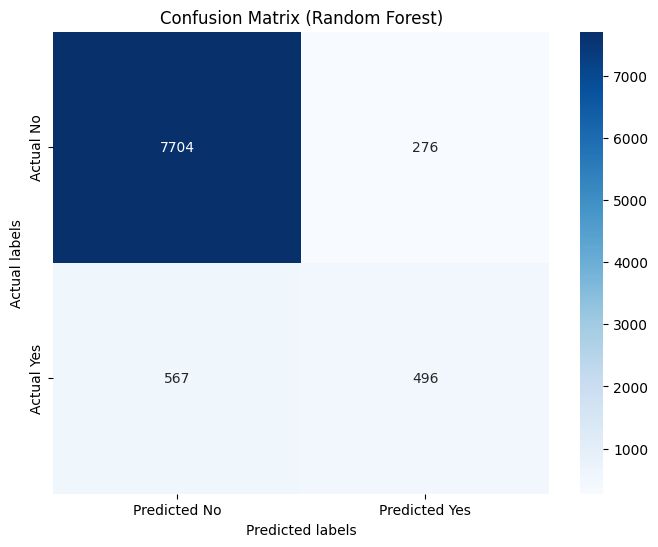

Accuracy: 0.9067787238748203
Precision: 0.6424870466321243
Recall: 0.4666039510818438
F1 Score: 0.5405994550408719


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier to the preprocessed training data
rf_classifier.fit(X_train_preprocessed, y_train)

# Predictions on the test set
y_pred = rf_classifier.predict(X_test_preprocessed)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualizing Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Visualizing Random Forest Tree (Just one tree for visualization)
#plt.figure(figsize=(20, 10))
#plot_tree(rf_classifier.estimators_[0], filled=True)
#plt.title("Random Forest Tree Visualization")
#plt.show()


#Support Vector machine

In [52]:
from sklearn.svm import SVC

# Initialize the SVM classifier
svm_classifier = SVC()

# Fit the classifier to the preprocessed training data
svm_classifier.fit(X_train_preprocessed, y_train)

# Predictions on the test set
y_pred_svm = svm_classifier.predict(X_test_preprocessed)


#Performance metrics of SVM

Confusion Matrix:
[[7980    0]
 [1063    0]]


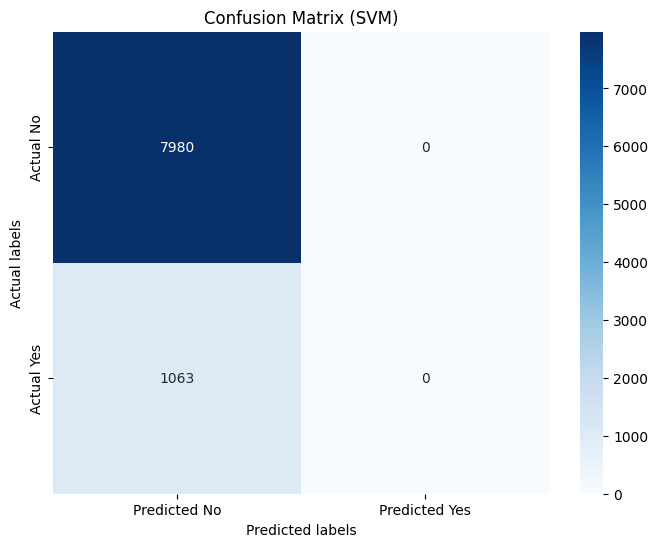

Accuracy: 0.8824505142098861
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:")
print(conf_matrix_svm)

# Visualizing Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix (SVM)')
plt.show()

# Accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy_svm)

# Precision
precision_svm = precision_score(y_test, y_pred_svm)
print("Precision:", precision_svm)

# Recall
recall_svm = recall_score(y_test, y_pred_svm)
print("Recall:", recall_svm)

# F1 Score
f1_svm = f1_score(y_test, y_pred_svm)
print("F1 Score:", f1_svm)


#KNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Fit the classifier to the preprocessed training data
knn_classifier.fit(X_train_preprocessed, y_train)

# Predictions on the test set
y_pred_knn = knn_classifier.predict(X_test_preprocessed)


#Performance metrics of KNN

Confusion Matrix:
[[7683  297]
 [ 715  348]]


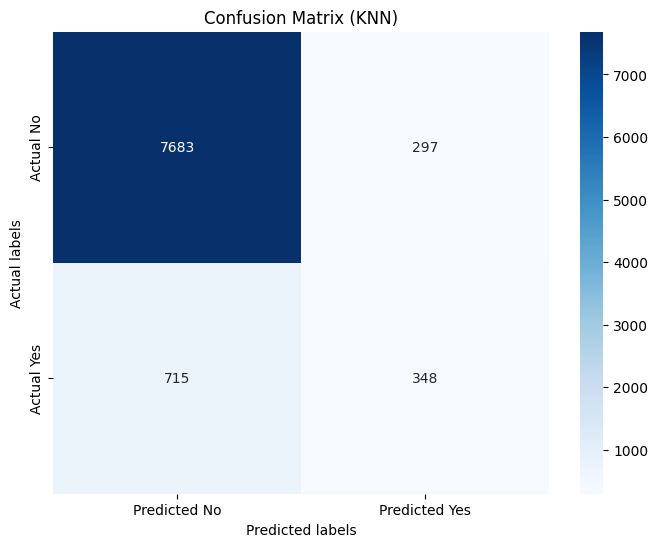

Accuracy: 0.8880902355413026
Precision: 0.5395348837209303
Recall: 0.3273753527751646
F1 Score: 0.40749414519906324


In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:")
print(conf_matrix_knn)

# Visualizing Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix (KNN)')
plt.show()

# Accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy_knn)

# Precision
precision_knn = precision_score(y_test, y_pred_knn)
print("Precision:", precision_knn)

# Recall
recall_knn = recall_score(y_test, y_pred_knn)
print("Recall:", recall_knn)

# F1 Score
f1_knn = f1_score(y_test, y_pred_knn)
print("F1 Score:", f1_knn)


#GBM


In [56]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the GBM classifier
gbm_classifier = GradientBoostingClassifier()

# Fit the classifier to the preprocessed training data
gbm_classifier.fit(X_train_preprocessed, y_train)

# Predictions on the test set
y_pred_gbm = gbm_classifier.predict(X_test_preprocessed)



#Performance of GBM

Confusion Matrix:
[[7628  352]
 [ 480  583]]


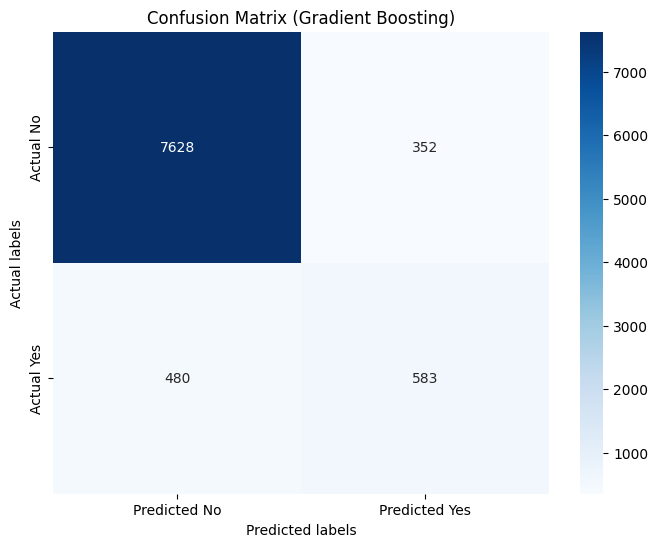

Accuracy: 0.907995134358067
Precision: 0.6235294117647059
Recall: 0.548447789275635
F1 Score: 0.5835835835835835


In [57]:
 from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
print("Confusion Matrix:")
print(conf_matrix_gbm)

# Visualizing Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gbm, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix (Gradient Boosting)')
plt.show()

# Accuracy
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
print("Accuracy:", accuracy_gbm)

# Precision
precision_gbm = precision_score(y_test, y_pred_gbm)
print("Precision:", precision_gbm)

# Recall
recall_gbm = recall_score(y_test, y_pred_gbm)
print("Recall:", recall_gbm)

# F1 Score
f1_gbm = f1_score(y_test, y_pred_gbm)
print("F1 Score:", f1_gbm)


#ADABOOST

In [58]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the AdaBoost classifier
adaboost_classifier = AdaBoostClassifier()

# Fit the classifier to the preprocessed training data
adaboost_classifier.fit(X_train_preprocessed, y_train)

# Predictions on the test set
y_pred_adaboost = adaboost_classifier.predict(X_test_preprocessed)



#Performance

Confusion Matrix:
[[7724  256]
 [ 639  424]]


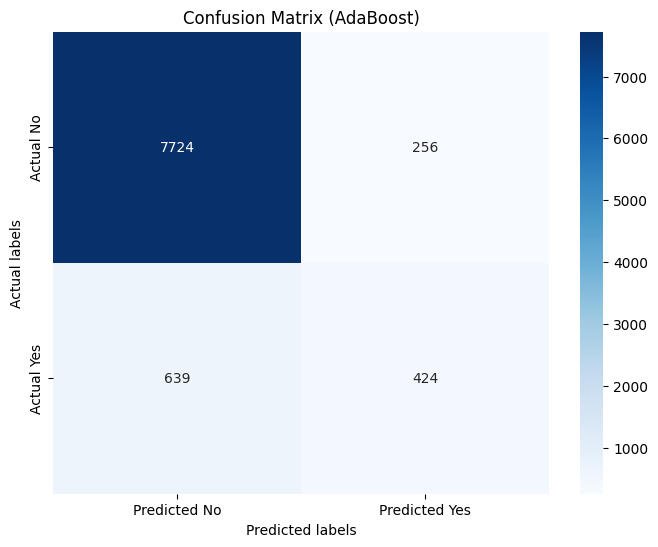

Accuracy: 0.9010284197721995
Precision: 0.6235294117647059
Recall: 0.3988711194731891
F1 Score: 0.4865174985656914


In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
conf_matrix_adaboost = confusion_matrix(y_test, y_pred_adaboost)
print("Confusion Matrix:")
print(conf_matrix_adaboost)

# Visualizing Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_adaboost, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix (AdaBoost)')
plt.show()

# Accuracy
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print("Accuracy:", accuracy_adaboost)

# Precision
precision_adaboost = precision_score(y_test, y_pred_adaboost)
print("Precision:", precision_adaboost)

# Recall
recall_adaboost = recall_score(y_test, y_pred_adaboost)
print("Recall:", recall_adaboost)

# F1 Score
f1_adaboost = f1_score(y_test, y_pred_adaboost)
print("F1 Score:", f1_adaboost)


#Compare which is efficient

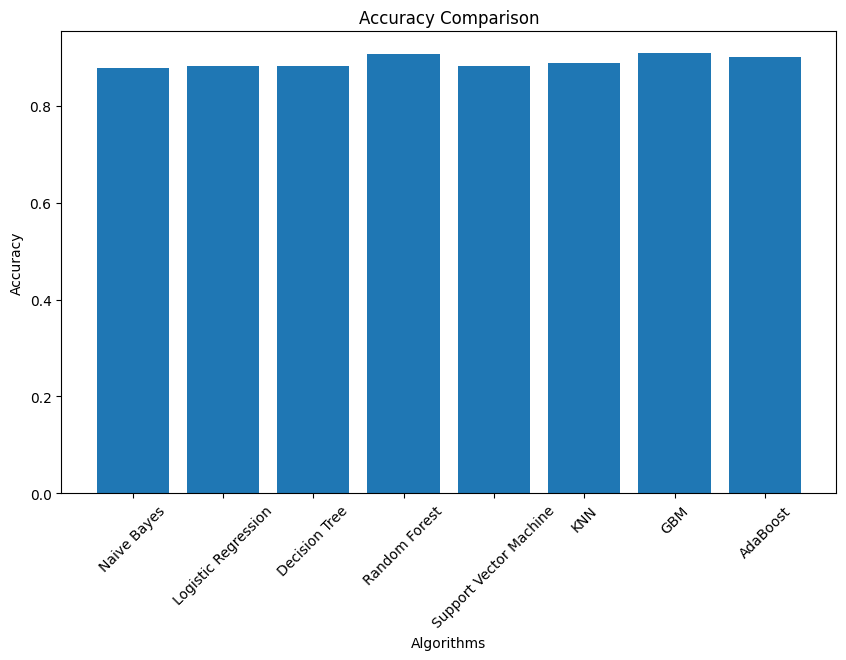

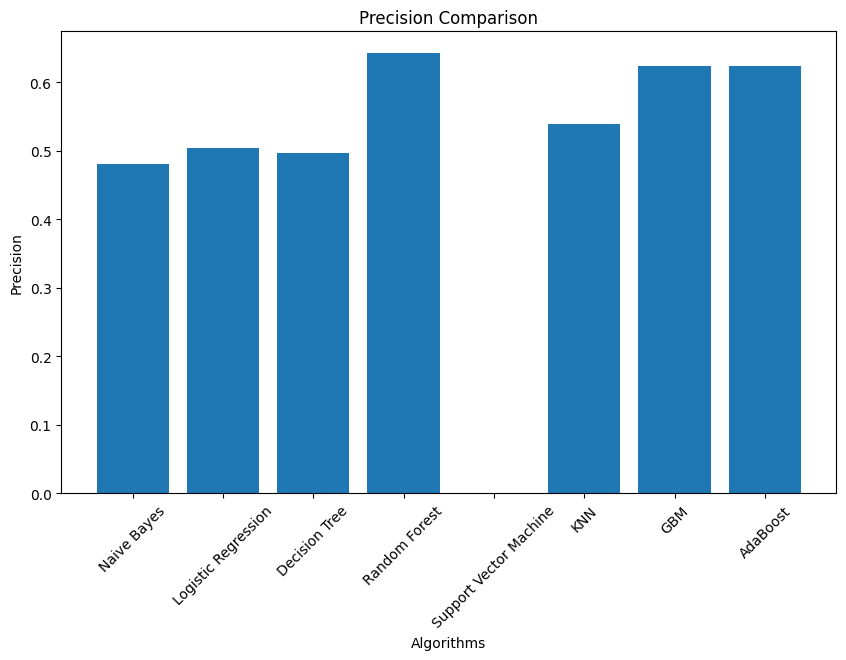

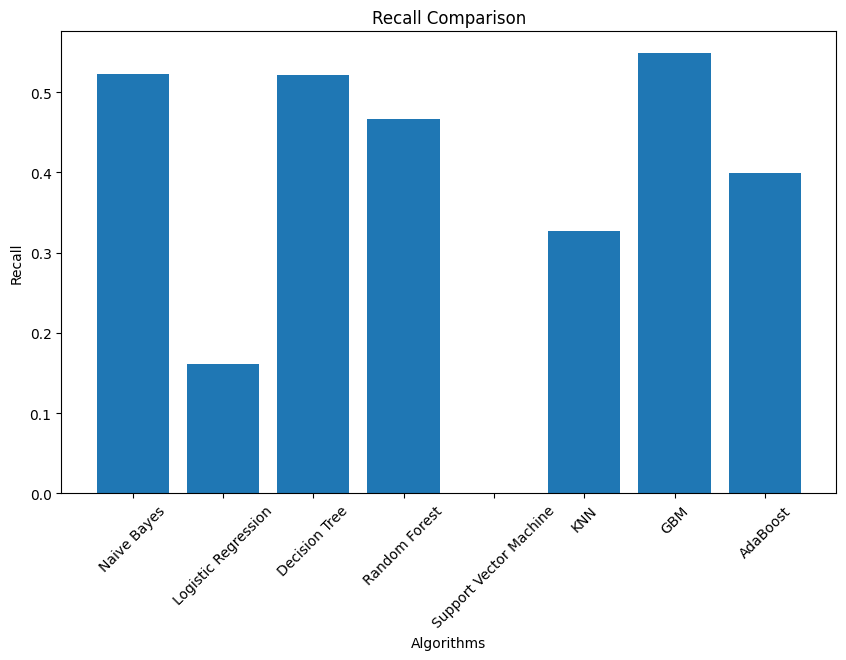

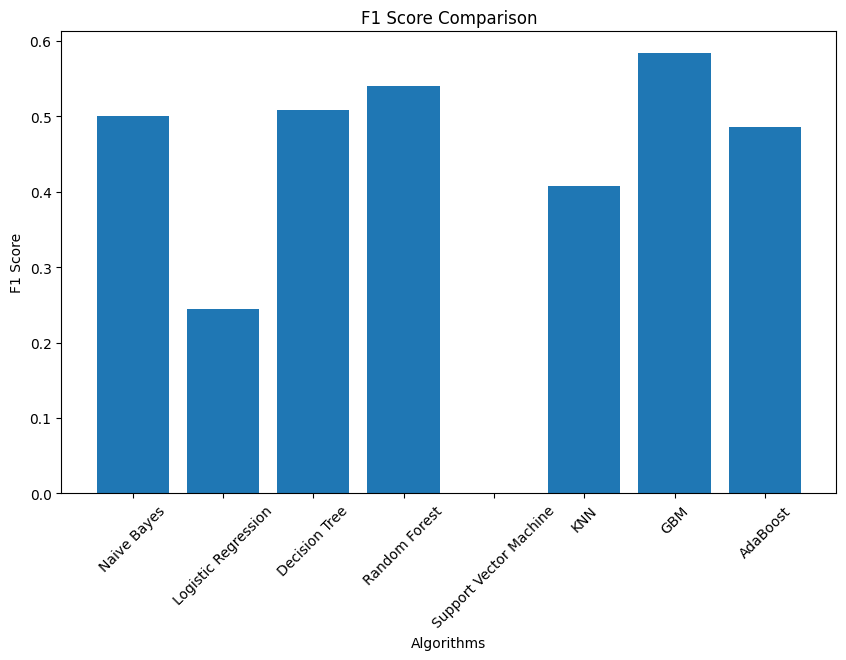

The most efficient algorithm is: GBM


In [62]:
 import matplotlib.pyplot as plt

# Performance metrics for each algorithm
performance_metrics = {
    "Naive Bayes": {"Accuracy": 0.8774742895056951, "Precision": 0.4805194805194805, "Recall": 0.522107243650047, "F1 Score": 0.5004508566275924},
    "Logistic Regression": {"Accuracy": 0.8827822625234988, "Precision": 0.5043988269794721, "Recall": 0.16180620884289745, "F1 Score": 0.245014245014245},
    "Decision Tree": {"Accuracy": 0.8817870175826606, "Precision": 0.49730700179533216, "Recall": 0.5211665098777046, "F1 Score": 0.5089572806614608},
    "Random Forest": {"Accuracy": 0.9067787238748203, "Precision": 0.6424870466321243, "Recall": 0.4666039510818438, "F1 Score": 0.5405994550408719},
    "Support Vector Machine": {"Accuracy": 0.8824505142098861, "Precision": 0.0, "Recall": 0.0, "F1 Score": 0.0},
    "KNN": {"Accuracy": 0.8880902355413026, "Precision": 0.5395348837209303, "Recall": 0.3273753527751646, "F1 Score": 0.40749414519906324},
    "GBM": {"Accuracy": 0.907995134358067, "Precision": 0.6235294117647059, "Recall": 0.548447789275635, "F1 Score": 0.5835835835835835},
    "AdaBoost": {"Accuracy": 0.9010284197721995, "Precision": 0.6235294117647059, "Recall": 0.3988711194731891, "F1 Score": 0.4865174985656914}
}

# Plotting performance metrics
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
for metric in metrics:
    plt.figure(figsize=(10, 6))
    plt.bar(performance_metrics.keys(), [metrics[metric] for metrics in performance_metrics.values()])
    plt.xlabel("Algorithms")
    plt.ylabel(metric)
    plt.title(f"{metric} Comparison")
    plt.xticks(rotation=45)
    plt.show()

# Determine the most efficient algorithm based on F1 Score
most_efficient_algorithm = max(performance_metrics, key=lambda x: performance_metrics[x]["F1 Score"])
print("The most efficient algorithm is:", most_efficient_algorithm)
